In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import assist_function

# load model

In [2]:
def unsupervised_GVI_pred(images):
    red = images[:, :, :, 0]
    green = images[:, :, :, 1]
    blue = images[:, :, :, 2]

    diff_1 = green - red
    diff_2 = green - blue

    diff_1[diff_1 < 0] = 0
    diff_2[diff_2 < 0] = 0

    Diff = diff_1 * diff_2
    
    Diff[Diff < 30] = 0
    Diff[Diff >= 30] = 1
    unsupervised_GVI_pred =[]

    for i in range(len(Diff)):
        pred = np.mean(Diff[i] != 0)
        unsupervised_GVI_pred.append(pred)

    unsupervised_GVI_pred = np.array(unsupervised_GVI_pred)

    return unsupervised_GVI_pred

# load data

In [3]:
current_model = [224, 224, 3]

X_pred = assist_function.load_and_resize_pred(
    "data/input_data/all_GSV_img_paths.txt", current_model)

print(X_pred.shape)

(6018, 224, 224, 3)


In [4]:
pred_metadata = assist_function.retrieve_metadata('data/input_data/all_GSV_img_paths.txt')
pred_metadata.head(3)

,lat,lng,heading
0,1.455238538601311,103.7626485082271,0
1,1.455238538601311,103.7626485082271,120
2,1.455238538601311,103.7626485082271,180


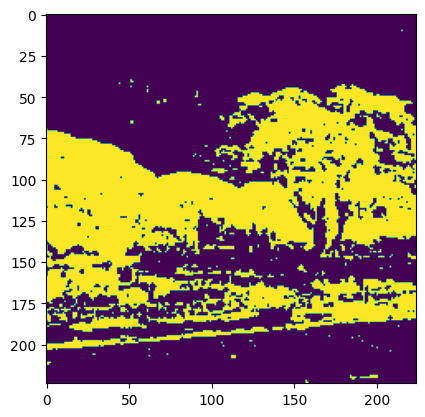

In [6]:
def unsupervised_segmentation(images):
    red = images[:, :, :, 0]
    green = images[:, :, :, 1]
    blue = images[:, :, :, 2]

    diff_1 = green - red
    diff_2 = green - blue

    diff_1[diff_1 < 0] = 0
    diff_2[diff_2 < 0] = 0

    Diff = diff_1 * diff_2
    Diff[Diff < 30] = 0
    Diff[Diff >= 30] = 1
    return Diff


import matplotlib.pyplot as plt
#plt.imshow(unsupervised_segmentation(X_pred.astype(float))[0])

# predict

In [5]:
import time
st =  time.time()

pred_ts = unsupervised_GVI_pred(X_pred.astype(float))   # need to change the type to float before proceeding
pred_ts.shape

et =  time.time()
elapsed_time = et - st
print('inference time = ', elapsed_time,'seconds')

inference time =  41.999627351760864 seconds


In [ ]:
60.1073842048645 / 6018 * 1000

9.987933566777086

In [6]:
PixSeg_prediction = pd.concat([pred_metadata, pd.Series(pred_ts.flatten())], 
                            axis=1)
PixSeg_prediction = PixSeg_prediction.rename(columns={0: 'pred'})
PixSeg_prediction

,lat,lng,heading,pred
0,1.455238538601311,103.7626485082271,0,0.369440
1,1.455238538601311,103.7626485082271,120,0.044483
2,1.455238538601311,103.7626485082271,180,0.007015
3,1.455238538601311,103.7626485082271,240,0.038225
4,1.455238538601311,103.7626485082271,300,0.273637
...,...,...,...,...
6013,1.472754438426505,103.763838550999,120,0.040079
6014,1.472754438426505,103.763838550999,180,0.008809
6015,1.472754438426505,103.763838550999,240,0.004584
6016,1.472754438426505,103.763838550999,300,0.088090


In [7]:
PixSeg_prediction.to_csv("data/output_data/PixSeg_prediction.csv")